In [13]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import joblib

In [14]:
df = pd.read_csv('../datasets/Mall_Customers.csv')

In [15]:
# Map genders to numbers
gender_map = {'Male': 0, 'Female': 1}
pd.set_option('future.no_silent_downcasting', True)
df['Gender'] = df['Gender'].replace(gender_map)

In [16]:
# Define spending categories based on score thresholds
def categorize_spending(score):
    if score < 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

In [17]:
# Apply the categorization function to create a new column 'Spending Category'
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending)
df.drop(columns=['CustomerID'], inplace=True)
df.drop(columns=['Spending Score (1-100)'], inplace=True)

              precision    recall  f1-score   support

        High       0.33      0.86      0.48         7
         Low       0.00      0.00      0.00        13
      Medium       0.50      0.55      0.52        20

    accuracy                           0.42        40
   macro avg       0.28      0.47      0.33        40
weighted avg       0.31      0.42      0.35        40



Text(0.5, 1.0, 'Logistic Confusion Matrix')

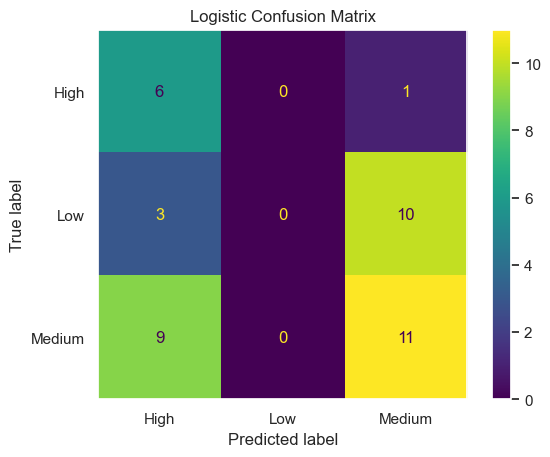

In [18]:
### Logistic ###
data = df.copy()
X = data.drop(columns=['Spending Category'])
y = data['Spending Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a multiclass logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)
# Save the model
joblib.dump(logreg, "../models/logistic.pkl")
# Make predictions on the test data
predictions = logreg.predict(X_test)

print(classification_report(y_test, predictions))
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cm,display_labels=logreg.classes_).plot()
plt.grid(False)
plt.title('Logistic Confusion Matrix')